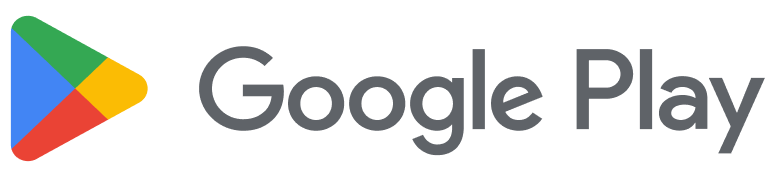

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:\\Users\\Siddhesh\\OneDrive\\Desktop\\my python project\\googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# Number of rows & columns

In [5]:
print(f"number of rows :{data.shape[0]}")
print(f"number of columns:{data.shape[1]}")

number of rows :10841
number of columns:13


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# check for Duplicates

In [7]:
data.duplicated().sum()
print(f"DataFrame has {data.duplicated().sum()} duplicate values")

DataFrame has 483 duplicate values


# Removing all duplicate values

In [8]:
data.drop_duplicates(inplace=True)
print(f"Total duplicate values:{data.duplicated().sum()}")

Total duplicate values:0


We have successfully removed all duplicate values

# check Null values

In [9]:
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Creating a function to get more useful information about the different attributes of the dataset

In [10]:
def printinfo():
    temp=pd.DataFrame(index=data.columns)
    temp['data_type']=data.dtypes
    temp['null_count']=data.isnull().sum()
    temp['unique_count']=data.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1465,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


We have some useful information about the dataset.
i.e., we can now see the missing number of values of any attribute,
its unique count, and
its respective data types.

# Data Cleaning Process

[ 'Content Rating' ] Column :
Missing Value

In [11]:
data[data["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can clearly see that row 10472 has missing data for the Category column and all the column values are in different format.
A better idea will be to drop this row from our DataFrame.

In [12]:
data.dropna(subset=["Content Rating"],inplace=True)

Unique Values & Their Count

In [13]:
data["Content Rating"].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [14]:
print(f"Total number of missing values in ['Content Rating'] column : {data['Content Rating'].isnull().sum()}")

Total number of missing values in ['Content Rating'] column : 0


[ 'Type' ] Column :
Missing Value

In [15]:
data[data["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [16]:
#Unique Values & Their Count
data['Type'].value_counts()


Free    9591
Paid     765
Name: Type, dtype: int64

[' Type' ] column has 2 unique values -
Free
Paid

Let's find 'mode' / most frequent value

In [17]:
data['Type'].mode()

print(f"The mode/ most frequent value is '{data['Type'].mode()[0]}'")

The mode/ most frequent value is 'Free'


There is only one missing value in this column
So, let's fill the missing value with the mode value.

In [18]:
data['Type'].fillna(data['Type'].mode()[0], inplace=True)

print(f"Total number of missing values in ['Type'] column after filling with mode value : {data['Type'].isnull().sum()}")

Total number of missing values in ['Type'] column after filling with mode value : 0


[ 'Rating' ] Column :
 Missing Value   

In [19]:
data[data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


unique values

In [20]:
data["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

Let's find 'mode'/ most frequent value

In [21]:
data['Rating'].mode()[0]

4.4

['Rating'] column has rating values 1-5
let's fill missing values with mode/most frequent value

In [22]:
data['Rating'].fillna(data['Rating'].mode()[0],inplace=True)

print(f"Total number of missing values in ['Rating'] column after filling with mode value: {data['Rating'].isnull().sum()}")

Total number of missing values in ['Rating'] column after filling with mode value: 0


we are having some of the unnecessary columns which will be pf not much use in the analysis process.

so let's drop those columns.

In [23]:
data.drop(['Current Ver','Last Updated', 'Android Ver'],axis=1, inplace=True)

After fixing all the missing values & dropping unnecessary columns, our data frame using printinfo( ) function :

In [24]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values

Columns like Reviews, Size, Installs, & Price should have an int or float datatype, But here we can see of object type, So let’s convert them to their respective correct type.

# Column Reviews , converting its type to int .

In [25]:
data['Reviews']=data['Reviews'].astype('int')
print(f"Dtype of ['Reviews'] column is now : {data['Reviews'].dtypes}")

Dtype of ['Reviews'] column is now : int32


removing the +symbol:

In [26]:
data['Size']=data['Size'].apply(lambda x: x.strip('+'))

removing the ,symbol:

In [27]:
data['Size']=data['Size'].apply(lambda x: x.replace (',',''))

Unique values

In [28]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Dropping the  M symbol by replacing with the value '000':
    so that,all size values become the kilobyte type.

In [29]:
data['Size']=data['Size'].str.replace("M","000")

Replaceing the k with "":

In [30]:
data['Size']= data['Size'].str.replace("k","")

Replacing "1000+" with 1000

In [31]:
data['Size'] = data['Size'].replace('Varies with device', np.nan)

Now, finally converting all these values to numeric type

In [32]:
data['Size'] = data['Size'].astype(float)

print(f"Dtype of ['Size'] column is now : {data['Size'].dtypes}")

Dtype of ['Size'] column is now : float64


# Dtypes of DataFrame

In [33]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,1526,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


since we have converted the Varies with device value to NaN, we have to do something with those set of NaN values data
It will be a better idea to drop the Rows of the column Size having NaN values because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.

In [34]:
data.dropna(subset=['Size'],inplace=True)
print(f"Total NaN values present in ['Size'] : {data['Size'].isnull().sum()}")

Total NaN values present in ['Size'] : 0


 'Installs' ] Column :
Unique Values

In [35]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

In [36]:
data['Installs'].value_counts()

1,000,000+        1231
100,000+          1020
10,000+            991
1,000+             856
10,000,000+        762
100+               693
5,000,000+         493
500,000+           472
5,000+             453
50,000+            441
10+                375
500+               320
50+                200
100,000,000+       192
50,000,000+        144
5+                  78
1+                  64
500,000,000+        24
0+                  14
1,000,000,000+       8
Name: Installs, dtype: int64

To convert this column from object to integer type.
First of all, we will need to remove the + symbol from these values.
then need to remove ',' symbol from the numbers.
And then replace 'Free' value with '0'

In [37]:
data['Installs']=data['Installs'].apply (lambda x: x.strip ('+'))

In [38]:
data['Installs']=data['Installs'].apply(lambda x:x.replace (',',''))

In [39]:
data['Installs']=data['Installs'].replace('Free','0')

Now we can convert [' Installs' ] column from string type to integer type, and then have a look at our dataset.

In [40]:
data['Installs']=data['Installs'].astype('int')
print(f"Dtype of ['Installs'] column is now : {data['Installs'].dtypes}")

Dtype of ['Installs'] column is now : int32


In [41]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int32,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


[ 'Price' ] Column :
Unique Values

In [42]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96',
       '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99',
       '$3.61', '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Need to remove '$' symbol

In [43]:
data['Price']=data['Price'].apply(lambda x: x.strip('$'))

In [44]:
data['Price'] = data['Price'].apply(lambda x : x.replace('Everyone', '0'))

Converting ['Price'] column from object to float type.

In [45]:
data['Price'] = data['Price'].astype('float')

print(f"Dtype of ['Price'] column is now : {data['Price'].dtypes}")

Dtype of ['Price'] column is now : float64


Let's have a final look at the data frame.

In [46]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int32,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8831 non-null   object 
 1   Category        8831 non-null   object 
 2   Rating          8831 non-null   float64
 3   Reviews         8831 non-null   int32  
 4   Size            8831 non-null   float64
 5   Installs        8831 non-null   int32  
 6   Type            8831 non-null   object 
 7   Price           8831 non-null   float64
 8   Content Rating  8831 non-null   object 
 9   Genres          8831 non-null   object 
dtypes: float64(3), int32(2), object(5)
memory usage: 689.9+ KB


# Data Visualization

# Top categories in the play store, which contains the highest number of apps?

In [48]:
x = data['Category'].value_counts()
x_axis = x.values.tolist()
y_axis = x.index.tolist()

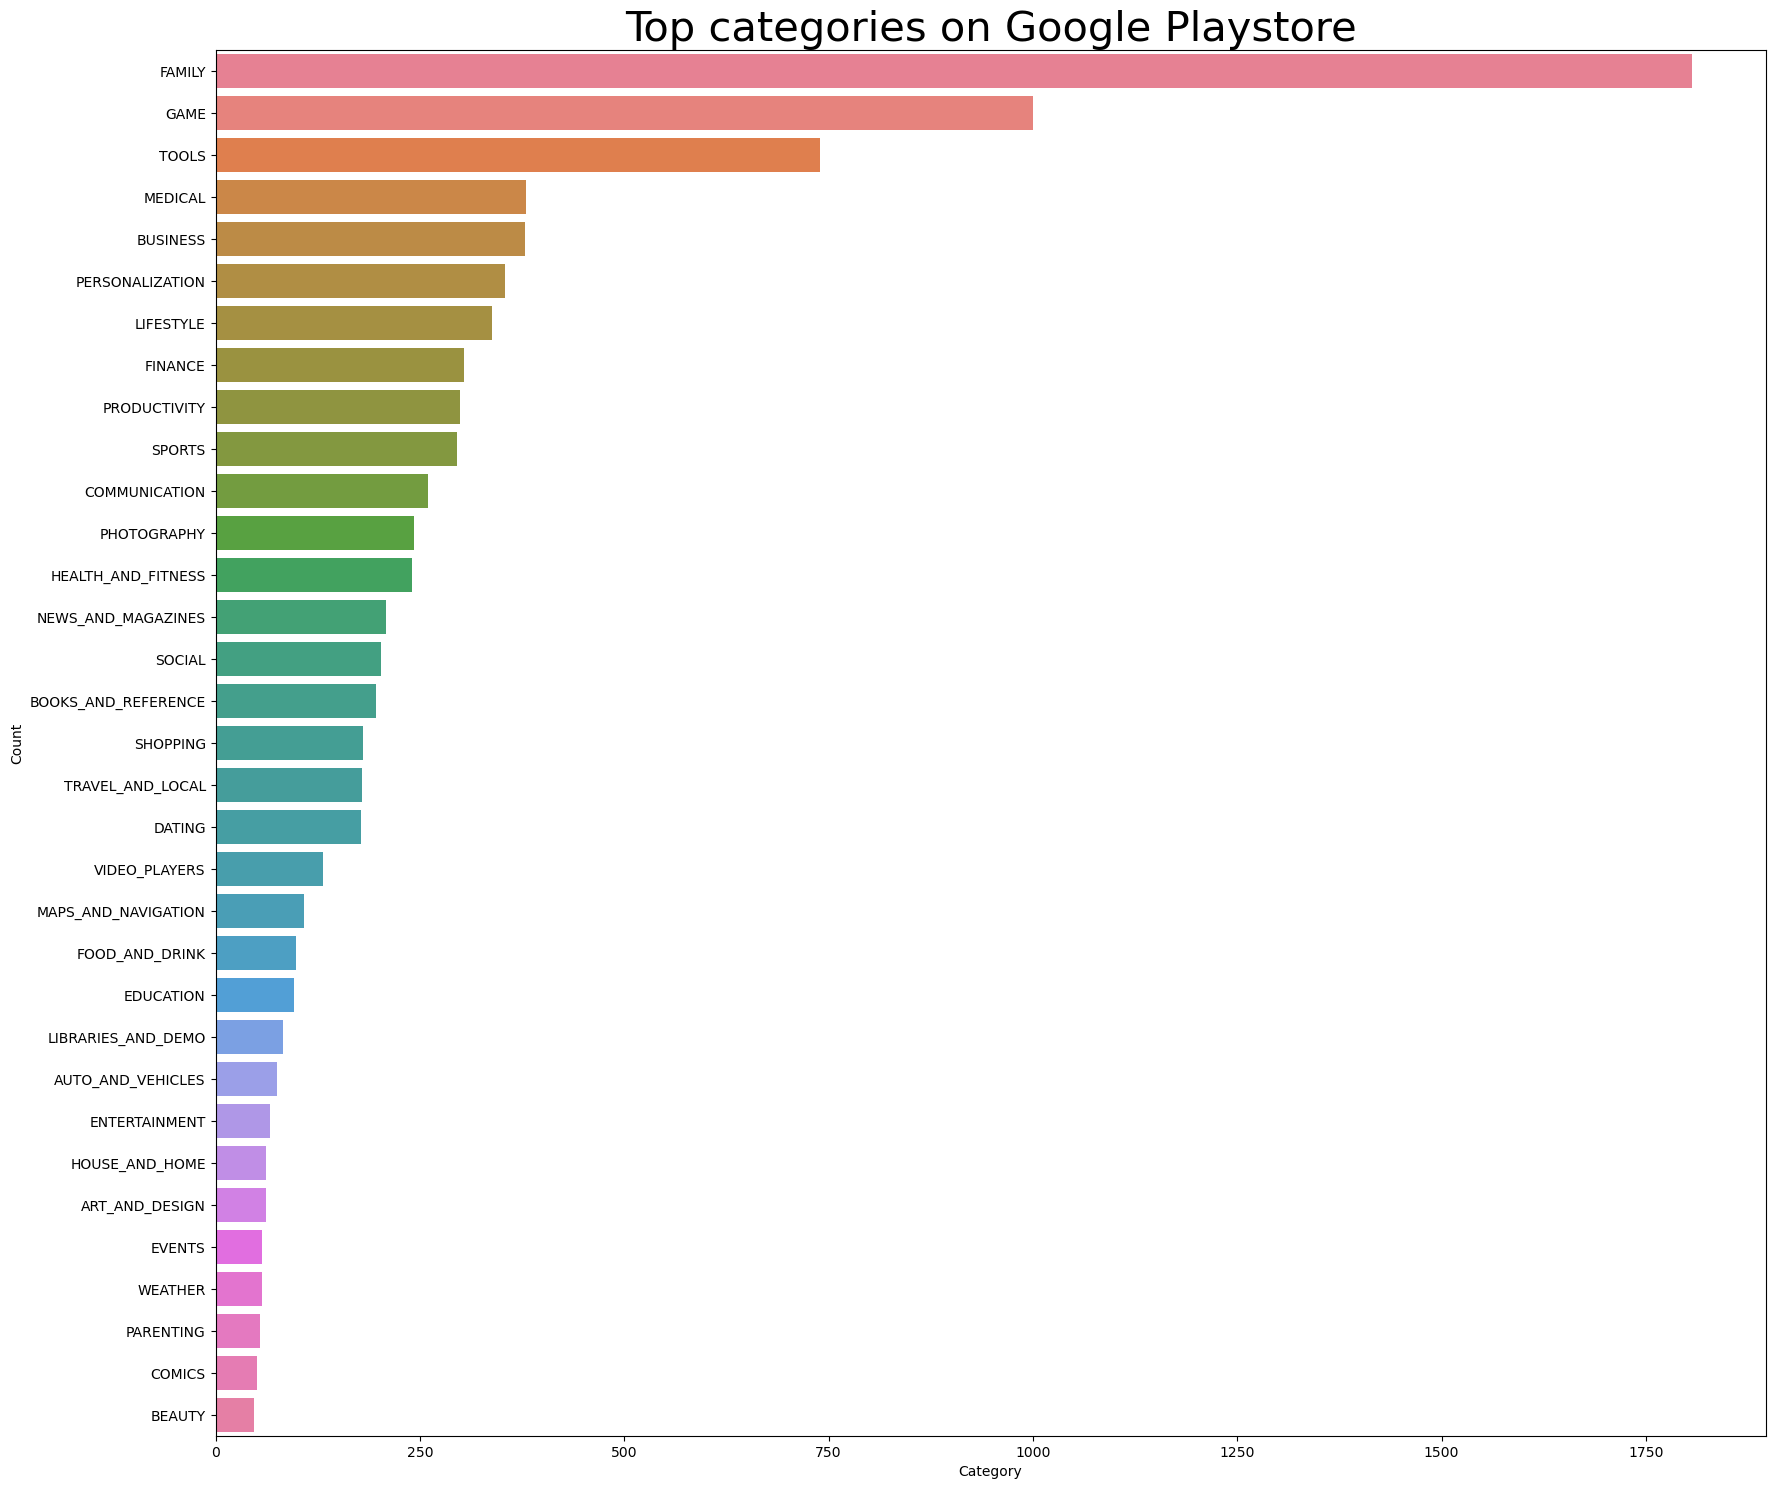

In [49]:
plt.figure(figsize=(20, 18))
plt.xlabel("Category")
plt.ylabel("Count")

graph = sns.barplot(x=x_axis, y=y_axis, palette="husl")
graph.set_title("Top categories on Google Playstore", fontsize=30)

plt.show()

There are total 33 categories in the dataset
From the above output we can come to the conclusion that,
Top categories in the play store, which contains the highest number of apps are under Family & Game category
And which contains the lowest number of apps are under Beauty & Comics Category.

# Which category of App from the ‘Content Rating’ column is found more on the play store?

In [50]:
x1 = data['Content Rating'].value_counts()
x1_axis = x1.index.tolist()
y1_axis = x1.values.tolist()

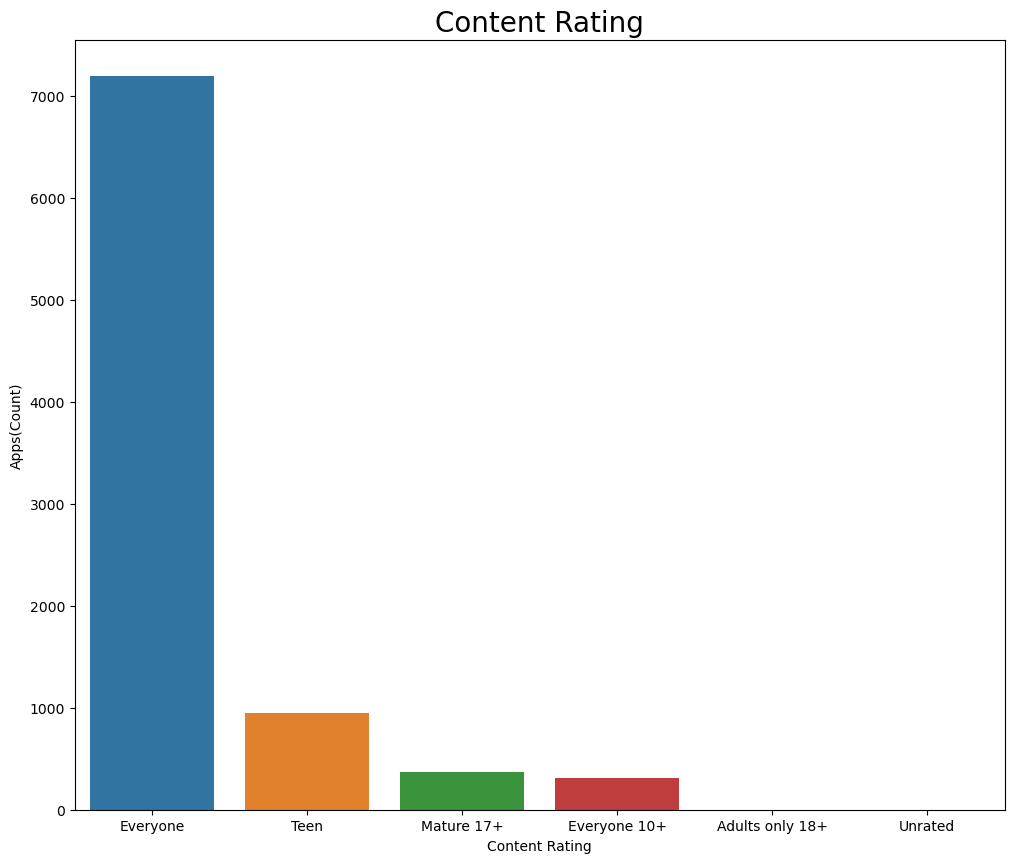

In [51]:
plt.figure(figsize=(12,10))
sns.barplot(x= x1_axis, y= y1_axis)
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

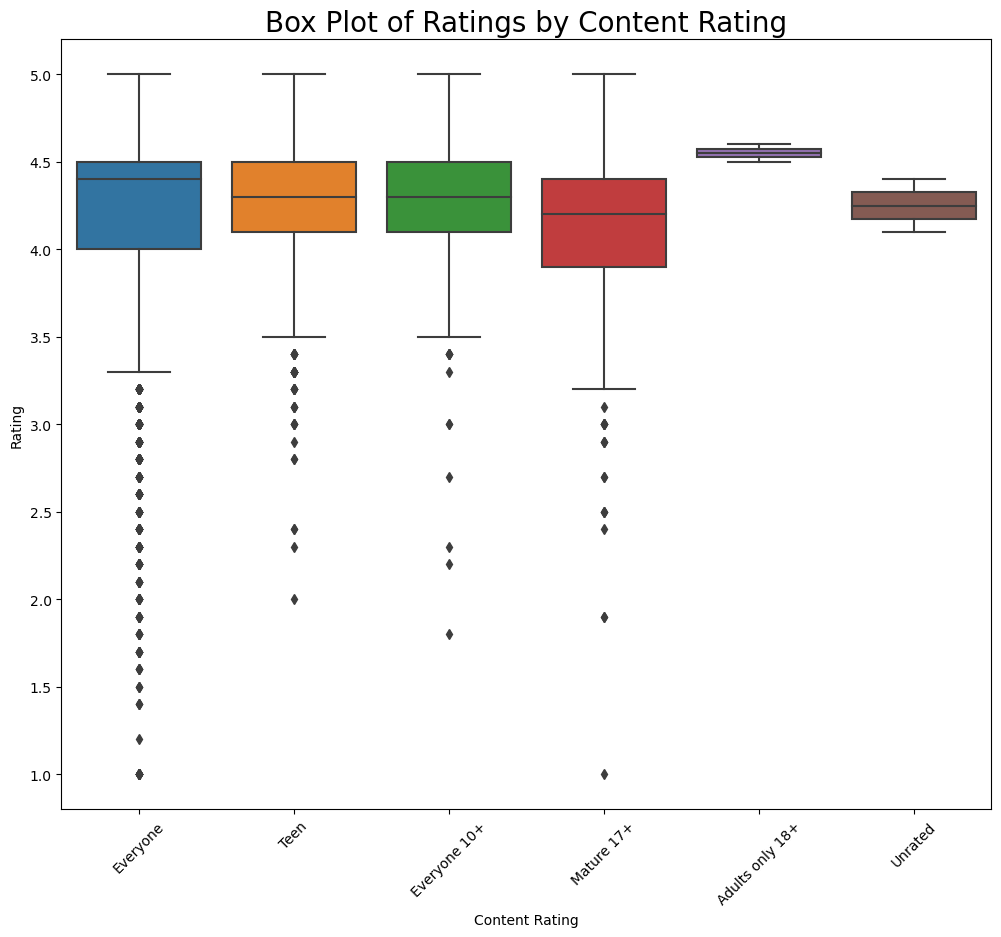

In [98]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=data['Content Rating'], y=data['Rating'])
plt.title('Box Plot of Ratings by Content Rating', size=20)
plt.ylabel('Rating')
plt.xlabel('Content Rating')
plt.xticks(rotation=45)
plt.show()


From the above plot, we can see that the 'Everyone' category has the highest number of apps.

# Let’s have a look at the distribution of the ratings of the DataFrame.

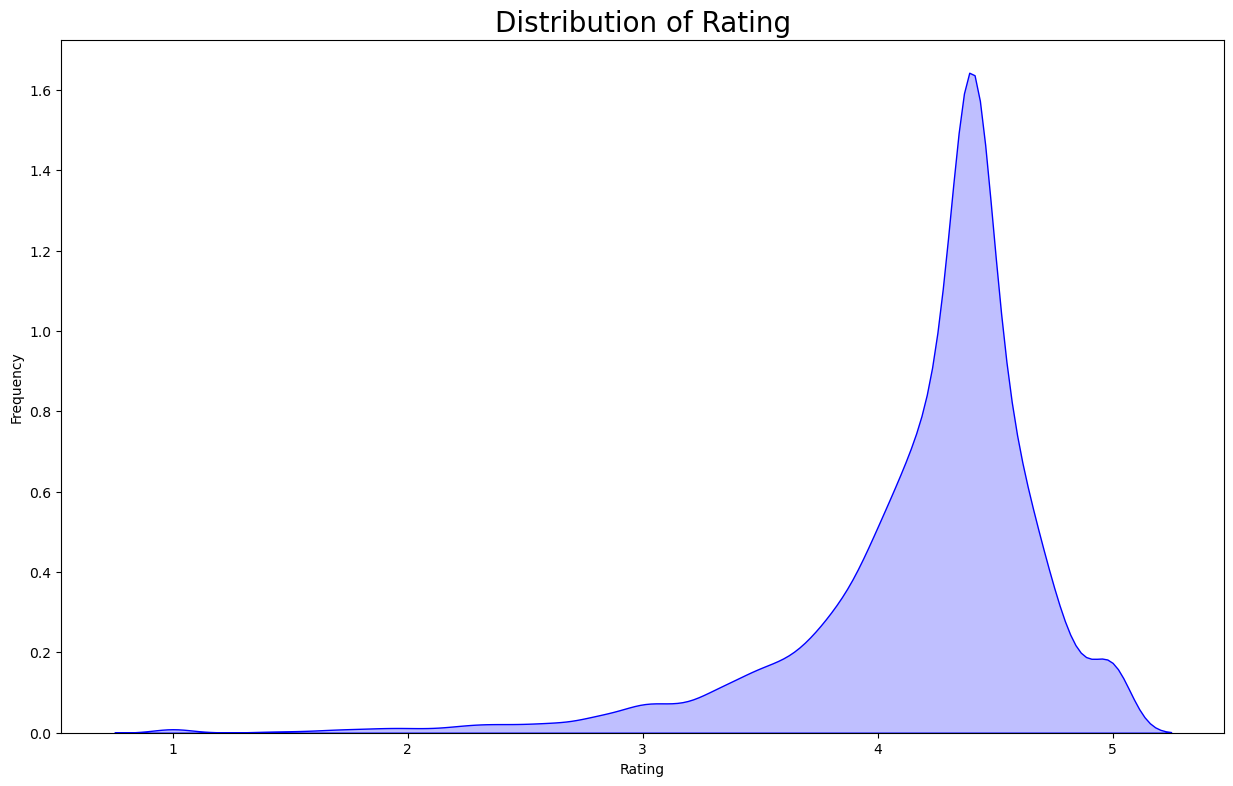

In [55]:


plt.figure(figsize=(15, 9))
plt.xlabel("Rating")
plt.ylabel("Frequency")

graph = sns.kdeplot(data['Rating'], color="blue", fill=True)
plt.title('Distribution of Rating', size=20)

plt.show()

From the above graph, we can come to the conclusion that,
most of the apps in the google play store are rated between 3.5 to 4.8.

# What portion of the apps in the play store are paid and free.

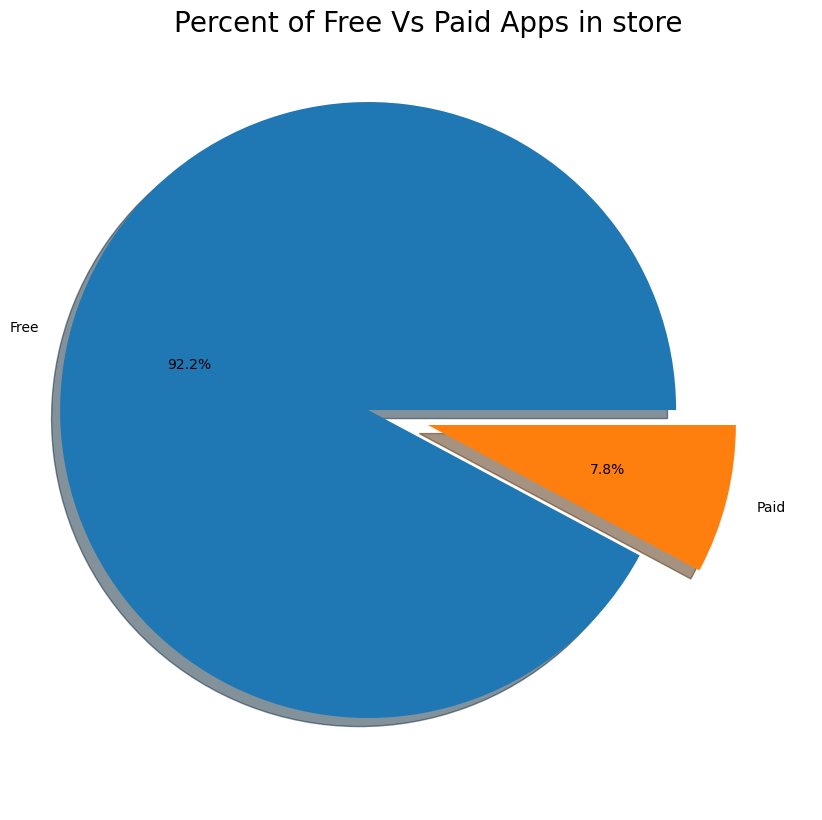

In [57]:
plt.figure(figsize=(10,10))
labels = data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

From the above graph, we can see that 92%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.

# Which category App’s have the most number of installs?

To answer this question we need to create a separate DataFrame out of our DataFrame which will contain a grouped value by Category and Installs.

In [58]:
highest_installs_data = data.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

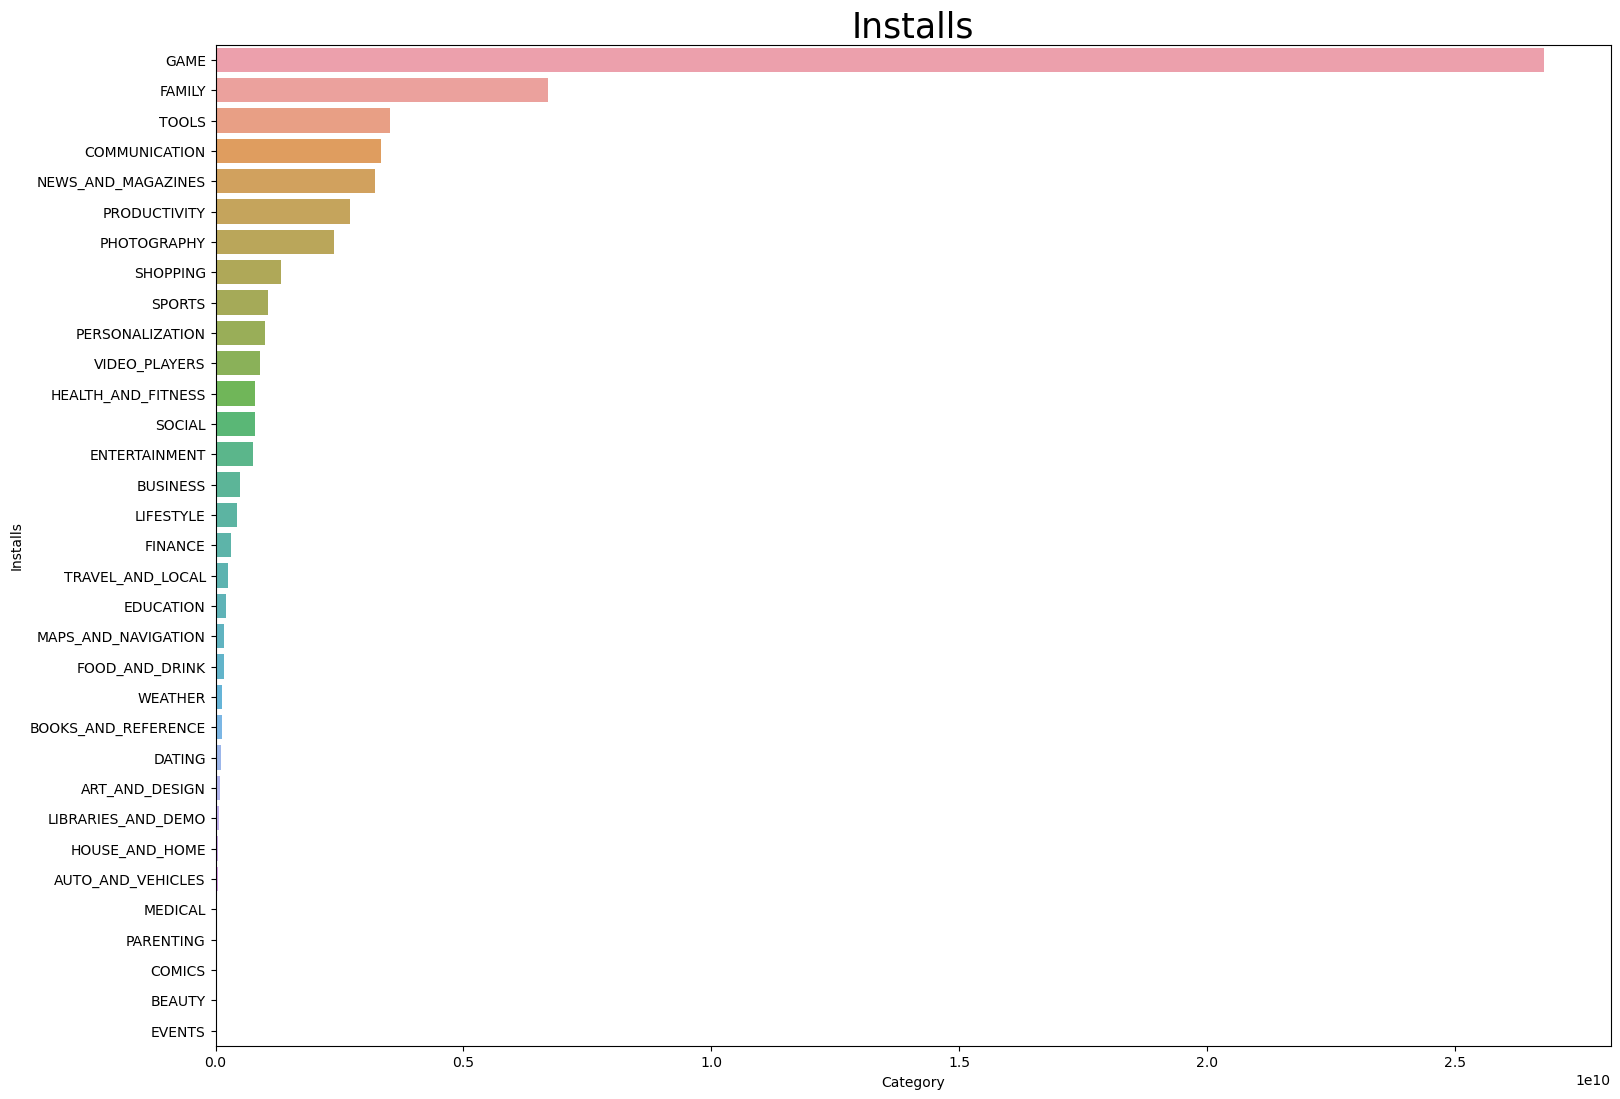

In [59]:
x_axis = []
y_axis = []

for i in range(len(highest_installs_data)):
    x_axis.append(highest_installs_data.Installs[i])
    y_axis.append(highest_installs_data.index[i])

plt.figure(figsize=(18, 13))

plt.xlabel("Category")
plt.ylabel("Installs")

graph = sns.barplot(x=x_axis, y=y_axis, alpha=0.9)
graph.set_title("Installs", fontsize=25)

plt.show()


From the above visualization, it can be interpreted that the top categories with the highest installs are Game, Family, Tools, Communication and News & Magazines.

# What are the Top 10 installed apps in any category?

Creating a function which should be able to return us a nice plot for any Category the name provided by any user as an argument to it

In [66]:
def Top10_inst_app_in_any_cat(str):
    str = str.upper()
    top10 = data[data['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,7))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps['App'], y = top10apps['Installs'])
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

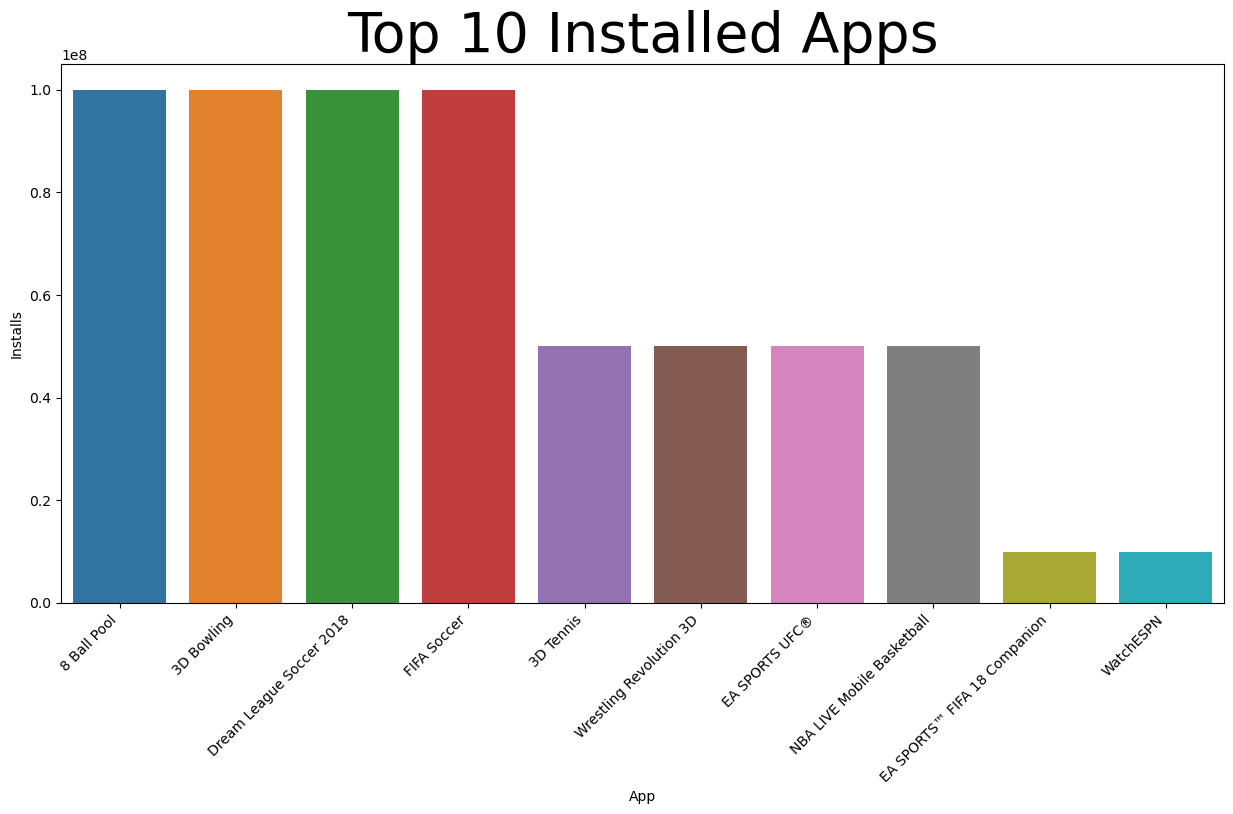

In [65]:
Top10_inst_app_in_any_cat('Sports')

From the above graph, we can see that in the Sports category 8 Ball Pool, 3D Bowling, Dream League Soccer 2018 & FIFA Soccer has the highest installs.


# Which are the top 10 expensive Apps in the play store?

creating a separate DataFrame

In [67]:
top10_paid_apps_data = data[data['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)

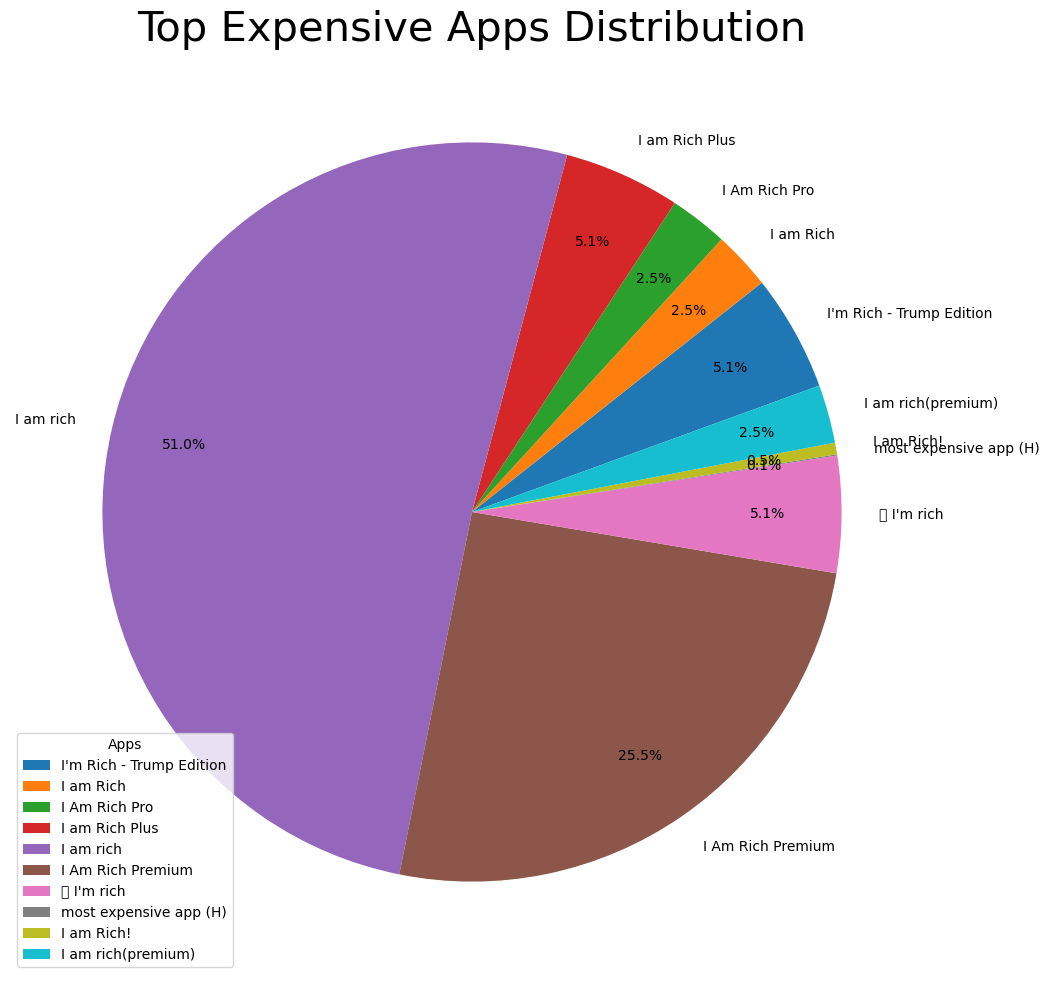

In [73]:
plt.figure(figsize=(15,12));
plt.pie(top10_paid_apps_data.Installs, explode=None, labels=top10_paid_apps_data.App, autopct='%1.1f%%', startangle=20, pctdistance= 0.8);
plt.title('Top Expensive Apps Distribution',size = 30);
plt.legend(top10_paid_apps_data.App, loc='lower left', title='Apps', fontsize = 'medium');

From the above graph, we can interpret that the App I am rich is the most expensive app in the google play store followed by I am Rich Premium.

# Which are the Apps with the highest number of reviews?

In [74]:
highest_rev_apps = data.sort_values(by='Reviews', ascending=False).head(20)

highest_rev_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1878,Clash Royale,GAME,4.6,23136735,97000.0,100000000,Free,0.0,Everyone 10+,Strategy
1721,Clash Royale,GAME,4.6,23134775,97000.0,100000000,Free,0.0,Everyone 10+,Strategy


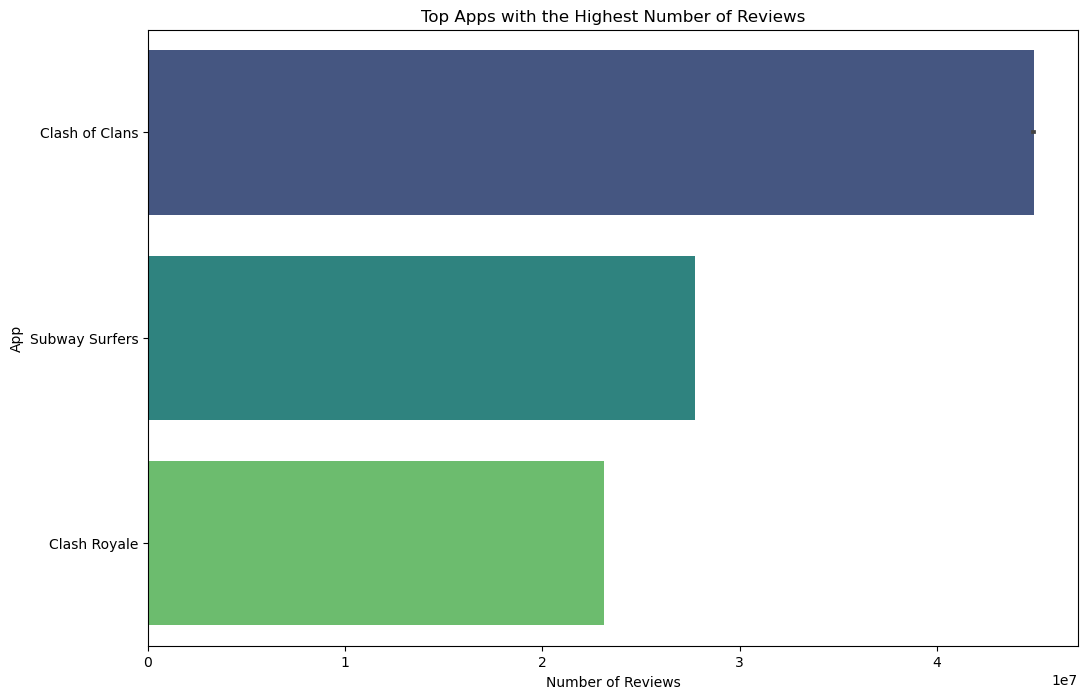

In [76]:

sorted_data = data.sort_values(by='Reviews', ascending=False)


top_apps_with_highest_reviews = sorted_data.head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x='Reviews', y='App', data=top_apps_with_highest_reviews, palette='viridis')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.title('Top Apps with the Highest Number of Reviews')
plt.show()

From the above data frame we can interpret that the Apps like Clash of Clans, Subway Surfers, Clash Royale, has the highest number of reviews on google play store.

# What are the count of Apps in different genres?

In [77]:
top_apps_in_genres = data['Genres'].value_counts().head(50)


In [78]:
x_axis = top_apps_in_genres.index.tolist()
y_axis = top_apps_in_genres.values.tolist()

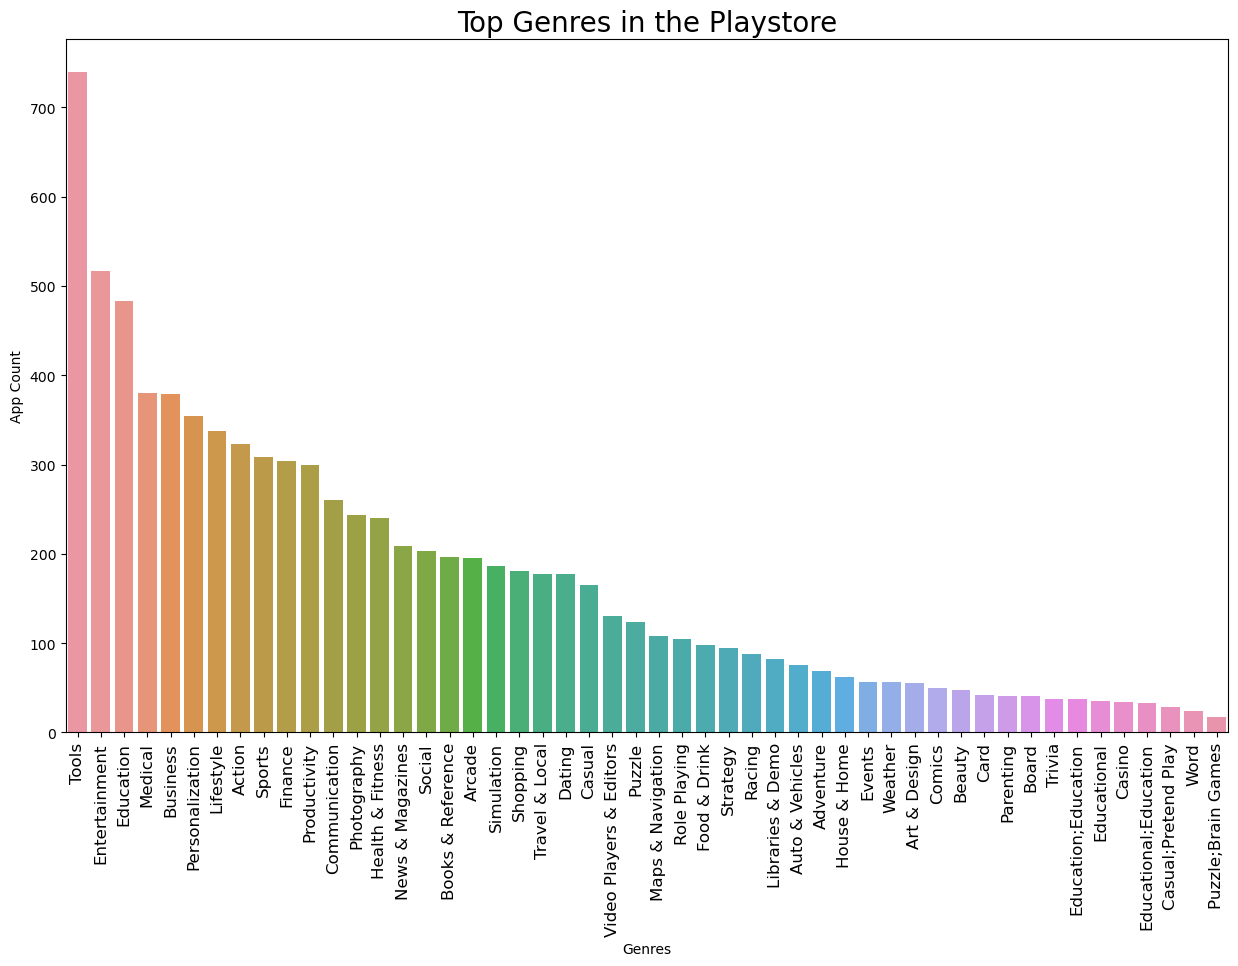

In [80]:
plt.figure(figsize=(15, 9))
plt.xlabel('Genres')
plt.ylabel('App Count')
plt.title("Top Genres in the Playstore", fontsize=20)
graph = sns.barplot(x=x_axis, y=y_axis)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)

plt.show()




From the above visualization, we can see that the Highest Number of Apps found in the Tools and Entertainment genres followed by Education, Medical and many more.

# Which are the apps that have made the highest-earning?

Need to create a separate DataFrame
Then multiply the Price column and the Installs column in order to get the earning of any particular app.

In [82]:
paid_apps_df = data[data['Type'] == 'Paid']

Now from the above DataFrame, we need to separate the columns which we require.

In [83]:
earning_df = paid_apps_df[['App', 'Installs', 'Price']]

Now adding a separate column Earnings to our new DataFrame, which we are creating by multiplying the two-columns Price and Installs

In [88]:
earning_df.loc[:, 'Earnings'] = earning_df['Installs'] * earning_df['Price']



C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_16908\769907001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earning_df.loc[:, 'Earnings'] = earning_df['Installs'] * earning_df['Price']


sort the above data by Earnings and Price.

In [89]:
earning_df_sorted_by_earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_price = earning_df_sorted_by_earnings.sort_values(by='Price', ascending=False)

In [90]:
earning_df_sorted_by_earnings

,App,Installs,Price,Earnings
5351,I am rich,100000,399.99,39999000.0
5356,I Am Rich Premium,50000,399.99,19999500.0
4034,Hitman Sniper,10000000,0.99,9900000.0
7417,Grand Theft Auto: San Andreas,1000000,6.99,6990000.0
5578,Sleep as Android Unlock,1000000,5.99,5990000.0
2883,Facetune - For Free,1000000,5.99,5990000.0
8804,DraStic DS Emulator,1000000,4.99,4990000.0
4367,I'm Rich - Trump Edition,10000,400.00,4000000.0
4362,💎 I'm rich,10000,399.99,3999900.0
5354,I am Rich Plus,10000,399.99,3999900.0


In [91]:
earning_df_sorted_by_price

,App,Installs,Price,Earnings
4367,I'm Rich - Trump Edition,10000,400.00,4000000.0
5351,I am rich,100000,399.99,39999000.0
5356,I Am Rich Premium,50000,399.99,19999500.0
5369,I am Rich,5000,399.99,1999950.0
5362,I Am Rich Pro,5000,399.99,1999950.0
5354,I am Rich Plus,10000,399.99,3999900.0
4362,💎 I'm rich,10000,399.99,3999900.0
5359,I am rich(premium),5000,399.99,1999950.0
5366,I Am Rich,10000,389.99,3899900.0
5355,I am rich VIP,10000,299.99,2999900.0


C:\Users\Siddhesh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


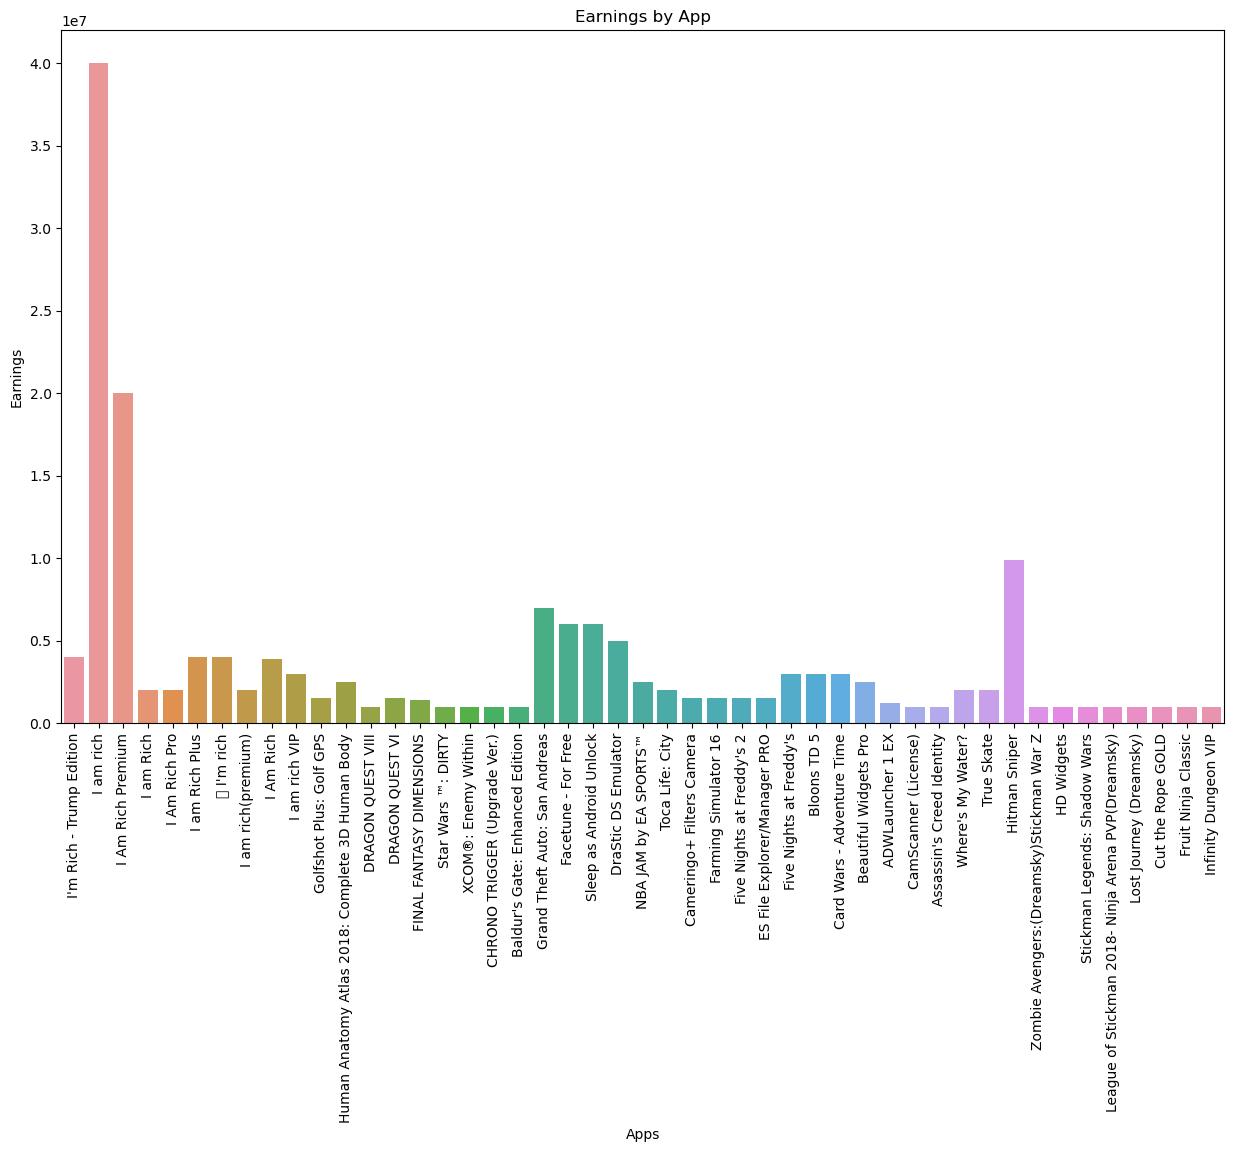

In [95]:
plt.figure(figsize=(15, 9))
sns.barplot(x=earning_df_sorted_by_price['App'], y=earning_df_sorted_by_price['Earnings'])
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.xticks(rotation=90)
plt.title("Earnings by App")
plt.show()


In conclusion, the analysis of the Play Store dataset reveals valuable insights. The Family and Game categories boast the highest number of apps, while Beauty and Comics have the fewest. Among content ratings, 'Everyone' dominates the Play Store. The majority of apps garner ratings between 3.5 to 4.8. Moreover, approximately 92% of apps are offered for free. Lastly, in terms of installs, Game, Family, Tools, Communication, and News & Magazines emerge as the most popular categories.
